In [0]:
import torch

In [0]:
from torchvision import datasets,transforms

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
trainset=datasets.MNIST("~/.pytorch/MNIST_data/",download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20545648.50it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


32768it [00:00, 316654.08it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 5496748.32it/s]                           
8192it [00:00, 130184.06it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
import matplotlib.pyplot as plt

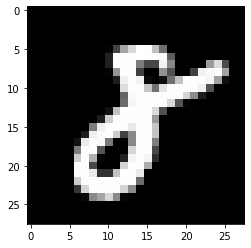

In [0]:
plt.imshow(images[1].numpy().squeeze(),cmap="Greys_r")

In [0]:
input=images.view(images.shape[0],-1)
n_input=784
n_hidden=256
n_output=10
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
B1=torch.randn(n_hidden)   #B1=torch.randn(1,n_hidden) not used as input is torch.Size([64, 1, 28, 28]) dimension
B2=torch.randn(n_output)  #B2=torch.randn((1,n_output))

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
torch.mm(input,W1)

tensor([[-33.2258,  -2.8003, -19.4740,  ..., -28.4807, -25.8809,  15.7613],
        [ -8.4260,  -4.8786, -40.6170,  ..., -36.2042,   1.4699,   7.5717],
        [-43.1829, -36.0819,  -0.2039,  ...,   7.2466, -38.2613,  10.4155],
        ...,
        [-23.8439, -25.0020, -34.8564,  ..., -15.0687, -37.0935,  21.3565],
        [-67.1674, -37.1210, -25.6966,  ..., -19.4707, -48.4050,  -7.1964],
        [-24.1049, -18.5074,  -6.3510,  ..., -11.3148, -34.0011,  35.0561]])

In [0]:
torch.mm(input,W1)+B1

tensor([[-33.1218,  -1.8445, -20.6608,  ..., -28.6692, -27.1507,  15.7907],
        [ -8.3220,  -3.9228, -41.8038,  ..., -36.3927,   0.2001,   7.6010],
        [-43.0789, -35.1261,  -1.3907,  ...,   7.0581, -39.5310,  10.4448],
        ...,
        [-23.7399, -24.0462, -36.0432,  ..., -15.2572, -38.3632,  21.3859],
        [-67.0633, -36.1652, -26.8833,  ..., -19.6592, -49.6748,  -7.1670],
        [-24.0008, -17.5516,  -7.5377,  ..., -11.5033, -35.2708,  35.0855]])

In [0]:
output1=activation(torch.mm(input,W1)+B1)
output2=activation(torch.mm(output1,W2)+B2)

In [0]:
output2

tensor([[9.9499e-01, 1.3089e-09, 2.2650e-06, 1.0000e+00, 2.1055e-08, 2.9838e-02,
         9.9956e-01, 4.5203e-03, 8.7541e-01, 1.2355e-05],
        [9.9906e-01, 2.3776e-02, 1.7087e-05, 4.3444e-01, 1.3630e-11, 5.9769e-05,
         9.9750e-01, 5.4574e-01, 4.4792e-01, 8.1344e-03],
        [1.3998e-01, 5.4940e-04, 2.4144e-09, 9.9618e-01, 1.9940e-05, 2.5512e-04,
         9.9987e-01, 7.2119e-03, 2.1626e-01, 2.0508e-08],
        [9.0915e-01, 2.7755e-06, 2.6146e-05, 9.8931e-01, 4.9758e-06, 5.3045e-07,
         9.9999e-01, 4.8826e-01, 8.8649e-02, 1.2684e-07],
        [1.0463e-01, 1.7322e-03, 4.3397e-04, 1.6427e-01, 1.2029e-05, 3.1286e-03,
         1.0000e+00, 1.2859e-01, 1.1889e-02, 8.6685e-08],
        [9.2699e-01, 8.9814e-01, 1.3578e-04, 1.0000e+00, 3.9503e-05, 5.5698e-04,
         9.9690e-01, 5.1047e-03, 1.3020e-05, 2.1753e-09],
        [9.1180e-01, 2.0044e-04, 6.3373e-02, 3.4747e-01, 1.5329e-09, 7.7719e-04,
         1.0000e+00, 2.7957e-04, 6.5405e-02, 2.9992e-05],
        [9.7323e-01, 2.0296

In [0]:
torch.exp(output2).shape

torch.Size([64, 10])

In [0]:
torch.sum(torch.exp(output2))

tensor(987.5542)

In [0]:
torch.sum(torch.exp(output2),dim=0)  #dim=0 sum of a column

tensor([145.9167,  71.7259,  72.6261, 148.8071,  65.6421,  68.8656, 158.8706,
        104.0200,  86.2382,  64.8418])

In [0]:
torch.sum(torch.exp(output2),dim=1)  #dim=1 sum of a single row 

tensor([16.5748, 15.2946, 13.8256, 15.6120, 12.1616, 16.4159, 13.7569, 16.4641,
        15.1266, 15.3773, 17.4741, 14.7205, 15.6530, 15.1957, 16.5665, 15.5369,
        15.4458, 16.7283, 15.0826, 13.2293, 16.2183, 15.9807, 14.2440, 16.7477,
        13.1700, 14.6664, 12.9470, 15.5521, 15.0749, 16.2335, 14.4091, 15.3438,
        14.5954, 15.4908, 17.0896, 14.8640, 15.8095, 17.2156, 12.9764, 12.8176,
        15.3321, 15.9271, 17.2835, 14.7880, 16.9577, 16.3396, 14.4478, 19.3014,
        19.9404, 16.8160, 15.1463, 15.2063, 13.4242, 13.9741, 16.5211, 15.3197,
        15.8349, 11.9434, 14.6734, 15.1869, 17.1422, 16.4582, 15.8366, 16.0651])

In [0]:
torch.sum(torch.exp(output2),dim=1).view(-1,1)

tensor([[16.5748],
        [15.2946],
        [13.8256],
        [15.6120],
        [12.1616],
        [16.4159],
        [13.7569],
        [16.4641],
        [15.1266],
        [15.3773],
        [17.4741],
        [14.7205],
        [15.6530],
        [15.1957],
        [16.5665],
        [15.5369],
        [15.4458],
        [16.7283],
        [15.0826],
        [13.2293],
        [16.2183],
        [15.9807],
        [14.2440],
        [16.7477],
        [13.1700],
        [14.6664],
        [12.9470],
        [15.5521],
        [15.0749],
        [16.2335],
        [14.4091],
        [15.3438],
        [14.5954],
        [15.4908],
        [17.0896],
        [14.8640],
        [15.8095],
        [17.2156],
        [12.9764],
        [12.8176],
        [15.3321],
        [15.9271],
        [17.2835],
        [14.7880],
        [16.9577],
        [16.3396],
        [14.4478],
        [19.3014],
        [19.9404],
        [16.8160],
        [15.1463],
        [15.2063],
        [13.

In [0]:
torch.sum(torch.exp(output2),dim=1).shape

torch.Size([64])

In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [0]:
probabilities=softmax(output2)
probabilities

tensor([[0.1632, 0.0603, 0.0603, 0.1640, 0.0603, 0.0622, 0.1639, 0.0606, 0.1448,
         0.0603],
        [0.1776, 0.0670, 0.0654, 0.1010, 0.0654, 0.0654, 0.1773, 0.1128, 0.1023,
         0.0659],
        [0.0832, 0.0724, 0.0723, 0.1959, 0.0723, 0.0723, 0.1966, 0.0729, 0.0898,
         0.0723],
        [0.1590, 0.0641, 0.0641, 0.1723, 0.0641, 0.0641, 0.1741, 0.1044, 0.0700,
         0.0641],
        [0.0913, 0.0824, 0.0823, 0.0969, 0.0822, 0.0825, 0.2235, 0.0935, 0.0832,
         0.0822],
        [0.1539, 0.1496, 0.0609, 0.1656, 0.0609, 0.0610, 0.1651, 0.0612, 0.0609,
         0.0609],
        [0.1809, 0.0727, 0.0774, 0.1029, 0.0727, 0.0727, 0.1976, 0.0727, 0.0776,
         0.0727],
        [0.1607, 0.0607, 0.0611, 0.1530, 0.0607, 0.0607, 0.1651, 0.1425, 0.0747,
         0.0607],
        [0.1773, 0.0664, 0.0661, 0.1796, 0.0661, 0.0663, 0.1795, 0.0663, 0.0662,
         0.0661],
        [0.1768, 0.0660, 0.0650, 0.1768, 0.0650, 0.0650, 0.1767, 0.0785, 0.0651,
         0.0651],
        [0

In [0]:
print(probabilities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
#using NN module

In [0]:
from torch import nn

class Network(nn.Module):
  def __init__(self):
    super.__init__()
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1) #Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

  def forward(self,x):
    x=self.hidden(x)
    x=self.sigmoid(x)
    x=self.output(x)
    x=self.softmax(x)

    return x

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super.__init__()
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    

  def forward(self,x):
    x=F.sigmoid(self.hidden)
    x=F.softmax(self.output(x),dim=1)
    return x

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x